In [218]:
import numpy as np

In [219]:
nums = np.random.uniform(-10, 10, 100)

# nums = np.linspace(0,10,200)
# nums = np.concatenate((nums,np.linspace(50,100,100)))
nums = np.sort(nums)
nums

array([-9.96292716, -9.83091615, -9.19369573, -9.18311024, -9.12064117,
       -8.91724483, -8.81055549, -8.68409085, -8.62703836, -8.44593205,
       -8.27952579, -8.16247117, -7.89748633, -7.47665029, -7.46208025,
       -7.28438717, -7.21249092, -7.15814786, -6.45636267, -6.37909972,
       -6.10346817, -5.96104895, -5.47636605, -5.43964151, -5.0542014 ,
       -4.9207157 , -4.55780374, -4.16657434, -3.78707446, -3.76749163,
       -3.70249053, -3.51127872, -3.46570227, -2.95265833, -2.52699437,
       -2.1905687 , -2.16522508, -1.70977132, -1.18405663, -1.0332118 ,
       -0.66544594, -0.52595554, -0.4922592 , -0.44555478,  0.16490082,
        0.39170893,  0.84560665,  0.92954948,  0.94633901,  1.22623714,
        1.32467867,  1.60121294,  1.9382704 ,  1.97804114,  2.05427604,
        2.29445583,  2.31914758,  2.57001276,  3.1605867 ,  3.23769488,
        3.24190418,  3.51055248,  3.51718195,  3.7709281 ,  3.8047007 ,
        3.86472494,  3.97483562,  4.10566748,  4.55539145,  5.16

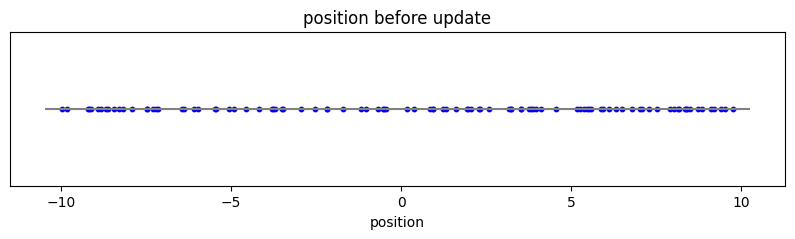

In [220]:
import matplotlib.pyplot as plt

# nums의 최소값과 최대값 구하기
min_num = np.min(nums)
max_num = np.max(nums)

# 1차원 선 그리기
plt.figure(figsize=(10, 2))
plt.hlines(1, min_num-0.5, max_num+0.5, colors='gray', linestyles='solid')

# nums 값들을 선 위에 점으로 시각화
plt.scatter(nums, np.ones_like(nums), color='b', s=10)

plt.title('position before update')
plt.xlabel('position')
plt.yticks([])
plt.show()

In [221]:
# from scipy.stats import norm
# 
# dens = []
# 
# for num in nums:
#     sum_p = 0
#     # 여기에 가우시안 넣어야 될듯
#     for num2 in nums:
#         if num != num2:
#             # gaussian 커널로 점들간 거리에 따라 확률추정
#             p = norm.pdf(num-num2, 0, 1)
#             # 점 num에서 확률추정
#             sum_p += p
# 
#     dens.append(sum_p / (len(nums)-1))
# 
# dens /= np.sum(dens)
#   
# plt.xlim([min_num-0.5, max_num+0.5])
# # plt.scatter(nums, dens, s=1)
# plt.plot(nums, dens)

## 이제 점을 옮겨야지
## 옮기려ㅈ면 기준 점에서 나머지 점들을 빼서 벡터를 만들고
## 그 벡터를 모드 더하면 어떻게든 하나의 방향이 나올거야
## 그 방향의 반대 방향으로 이동시키면

In [222]:
from scipy.stats import norm

count = 0

dens = np.zeros(len(nums))
vec = np.zeros(len(nums))

while count < 500:
        
    for i in range(len(nums)):
        sum_pdf = 0
        vec_total = 0
        # 여기에 가우시안 넣어야 될듯
        for num2 in nums:
            if nums[i] != num2:
                # gaussian 커널로 점들간 거리에 따라 확률추정
                # 이게 벡터의 크기
                p = norm.pdf(nums[i]-num2, 0, 1)
                # 점 num에서 확률추정
                sum_pdf += p
                vec_total += p * (nums[i]-num2)
            
        dens[i] = sum_pdf/(len(nums)-1)
        vec[i] = vec_total
        # dens.append(sum_pdf / (len(nums)-1))
        # vec.append(vec_total)
    
    dens /= np.sum(dens)
    nums += vec
    count += 1

In [223]:
# from scipy.stats import norm
# 
# def filter_with_pdf(nums):
#     count = 0
#     
#     dens = np.zeros(len(nums))
#     vec = np.zeros(len(nums))
#     
#     while count < 500:
#             
#         for i in range(len(nums)):
#             sum_pdf = 0
#             vec_total = 0
#             # 여기에 가우시안 넣어야 될듯
#             for num2 in nums:
#                 if nums[i] != num2:
#                     # gaussian 커널로 점들간 거리에 따라 확률추정
#                     # 이게 벡터의 크기
#                     p = norm.pdf(nums[i]-num2, 0, 1)
#                     # 점 num에서 확률추정
#                     sum_pdf += p
#                     vec_total += p * (nums[i]-num2)
#                 
#             dens[i] = sum_pdf/(len(nums)-1)
#             vec[i] = vec_total
#             # dens.append(sum_pdf / (len(nums)-1))
#             # vec.append(vec_total)
#         
#         dens /= np.sum(dens)
#         nums += vec
#         count += 1
#     return nums

In [224]:
## 지금 dens랑 num이랑 sort할 때 대응하여 정렬
nums_sorted = np.sort(nums)
index = np.argsort(nums)

dens_sorted = [dens[i] for i in index]

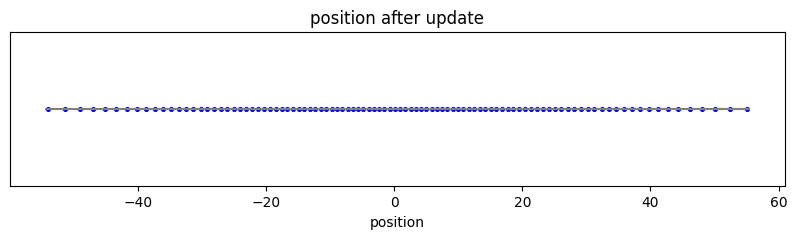

In [225]:
import matplotlib.pyplot as plt

# nums의 최소값과 최대값 구하기
min_num = np.min(nums)
max_num = np.max(nums)

# 1차원 선 그리기
plt.figure(figsize=(10, 2))
plt.hlines(1, min_num-0.5, max_num+0.5, colors='gray', linestyles='solid')

# nums 값들을 선 위에 점으로 시각화
plt.scatter(nums_sorted, np.ones_like(nums), color='b', s=7)

plt.title('position after update')
plt.xlabel('position')
plt.yticks([])
plt.show()

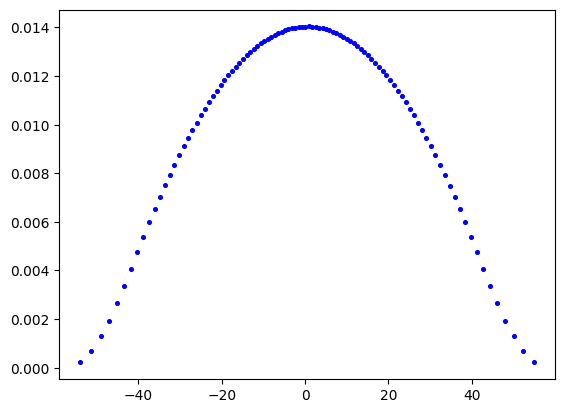

In [226]:
plt.xlim([min_num-5, max_num+5])
# plt.scatter(nums, dens, s=1)
# plt.plot(nums_sorted, dens_sorted)
plt.scatter(nums, dens, color='b', s=7)